## Perform clustering for the auto insurance data to obtain optimum number of clusters.

In [ ]:
#Import required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from feature_engine.outliers import Winsorizer

In [2]:
df_ins = pd.read_csv(r'D:\360digi\DS\Sharath\Hierarchical_clustering2\HandsOn\Dataset_Assignment Clustering\AutoInsurance.csv')
df_ins.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [3]:
df_ins.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### EXPLORATORY DATA ANALYSIS (EDA) / DESCRIPTIVE STATISTICS

In [5]:
print(df_ins.mean())
print('\n')
print(df_ins.median())
print('\n')
print(df_ins.mode())

#huge difference in values for mean and median, indicating presence of outliers

Customer Lifetime Value           8004.940475
Income                           37657.380009
Monthly Premium Auto                93.219291
Months Since Last Claim             15.097000
Months Since Policy Inception       48.064594
Number of Open Complaints            0.384388
Number of Policies                   2.966170
Total Claim Amount                 434.088794
dtype: float64


Customer Lifetime Value           5780.182197
Income                           33889.500000
Monthly Premium Auto                83.000000
Months Since Last Claim             14.000000
Months Since Policy Inception       48.000000
Number of Open Complaints            0.000000
Number of Policies                   2.000000
Total Claim Amount                 383.945434
dtype: float64


     Customer       State  Customer Lifetime Value Response Coverage  \
0     AA10041  California              2004.350666       No    Basic   
1     AA11235         NaN              2227.072755      NaN      NaN   
2     AA16582 

D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
#2nd Moment Business Decision(Measure of Dispersion)

In [7]:
print(df_ins.var())
print('\n')
print(df_ins.std())

Customer Lifetime Value          4.721020e+07
Income                           9.229386e+08
Monthly Premium Auto             1.183908e+03
Months Since Last Claim          1.014705e+02
Months Since Policy Inception    7.787443e+02
Number of Open Complaints        8.287982e-01
Number of Policies               5.712969e+00
Total Claim Amount               8.439030e+04
dtype: float64


Customer Lifetime Value           6870.967608
Income                           30379.904734
Monthly Premium Auto                34.407967
Months Since Last Claim             10.073257
Months Since Policy Inception       27.905991
Number of Open Complaints            0.910384
Number of Policies                   2.390182
Total Claim Amount                 290.500092
dtype: float64


D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
#3rd Business Moment Decision (Skewness)

In [9]:
df_ins.skew()

D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Customer Lifetime Value          3.032280
Income                           0.286887
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Total Claim Amount               1.714966
dtype: float64

In [10]:
#4th Business Moment Decision (Kurtosis)

In [11]:
df_ins.kurt()

D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Customer Lifetime Value          13.823533
Income                           -1.094326
Monthly Premium Auto              6.193605
Months Since Last Claim          -1.073668
Months Since Policy Inception    -1.133046
Number of Open Complaints         7.749308
Number of Policies                0.363157
Total Claim Amount                5.979401
dtype: float64

In [12]:
df_ins.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [13]:
df_ins.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

#### Handling duplicate

In [14]:
#Handling duplicates
duplicate = df_ins.duplicated()
print(duplicate)
sum(duplicate)

0       False
1       False
2       False
3       False
4       False
        ...  
9129    False
9130    False
9131    False
9132    False
9133    False
Length: 9134, dtype: bool


0

In [15]:
sum(duplicate)

0

In [16]:
duplicate.unique()  #No duplicate records exists.

array([False])

#### Missing value analysis

In [17]:
#Check for missing values
df_ins.isnull().sum() #No missing values

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

#### Dividing Categorical and Numerical variables from dataset

In [18]:
df_ins.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [19]:
df_ins_num = df_ins.iloc[:, [2,9,12,13,14,15,16,21]].copy()
df_ins_num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [20]:
#extracting column indexes of categorical data

all_col_list = list(np.arange(len(df_ins.columns)));
col_list = [2,9,12,13,14,15,16,21];
rem_col = np.setdiff1d(all_col_list,col_list);print(rem_col)

[ 0  1  3  4  5  6  7  8 10 11 17 18 19 20 22 23]


In [21]:
df_ins_cate = df_ins.iloc[:,rem_col].copy()
df_ins_cate.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### Outlier Analysis 

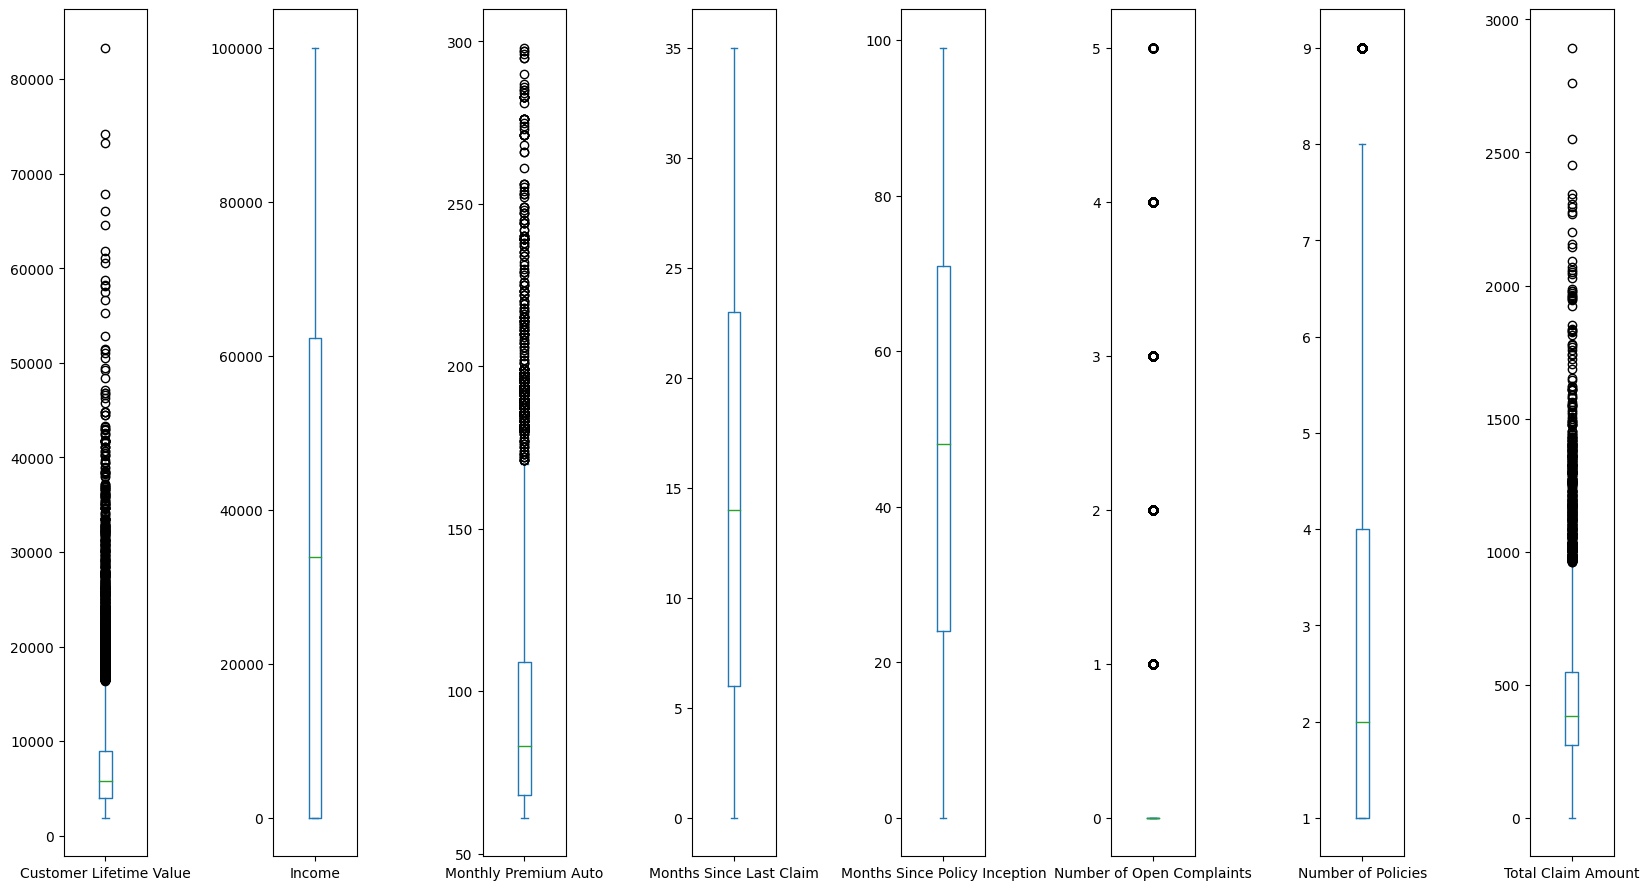

In [22]:
#Box plot visualization to view the outliers.

df_ins_num.plot(kind = 'box', subplots = True, sharey = False, figsize = (20, 11))

plt.subplots_adjust(wspace = 1.5)
plt.show()


#Customer Lifetime Value, Monthly Premium Auto, Number of Open Complaints, Number of Policies, Total Claim Amount columns have outliers


In [23]:
df_ins_num.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

## Winsorization

In [24]:
# Winsorization for "Customer Lifetime Value" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Customer Lifetime Value'])

df_ins_num['Customer Lifetime Value'] = winsor.fit_transform(df_ins_num[['Customer Lifetime Value']])


In [25]:
# Winsorization for "Monthly Premium Auto" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Monthly Premium Auto'])

df_ins_num['Monthly Premium Auto'] = winsor.fit_transform(df_ins_num[['Monthly Premium Auto']])


In [26]:
# Winsorization for "Number of Policies" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Number of Policies'])

df_ins_num['Number of Policies'] = winsor.fit_transform(df_ins_num[['Number of Policies']])


In [27]:
# Winsorization for "Total Claim Amount" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Total Claim Amount'])

df_ins_num['Total Claim Amount'] = winsor.fit_transform(df_ins_num[['Total Claim Amount']])


In [28]:
# Winsorization technique cannot be applied to columns 'Number of Open Complaints' because the variation in data is low. 

In [29]:
# Winsorization for "Number of Open Complaints" column
#winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Number of Open Complaints'])

#df_ins_num['Number of Open Complaints'] = winsor.fit_transform(df_ins_num[['Number of Open Complaints']])


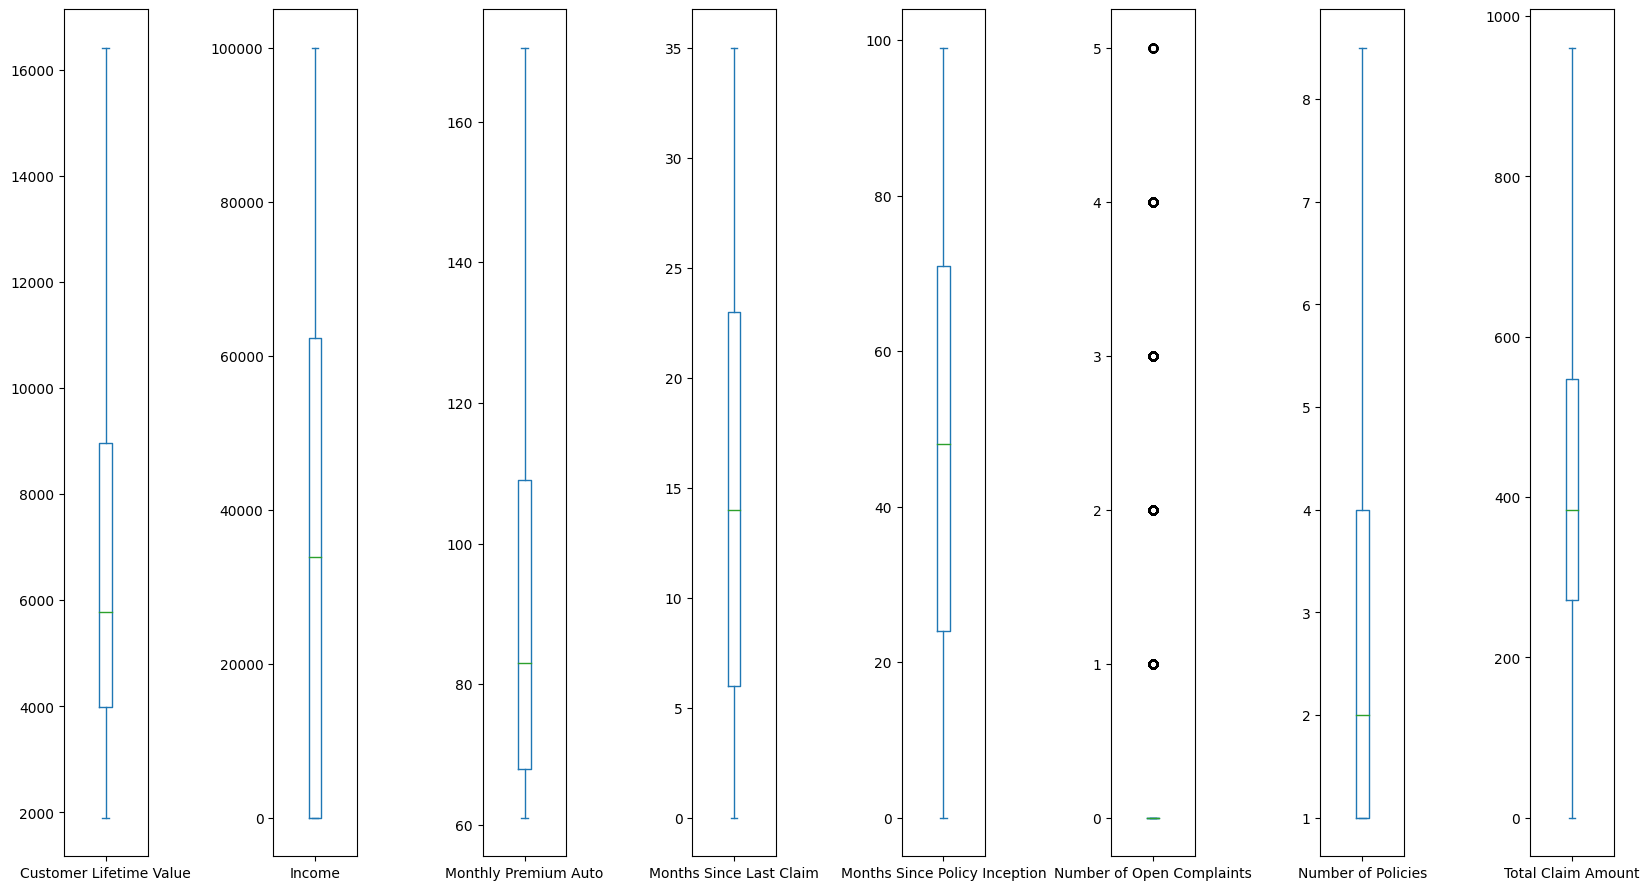

In [30]:
#Box plot visualization to view after the removal of outliers.

df_ins_num.plot(kind = 'box', subplots = True, sharey = False, figsize = (20, 11))

plt.subplots_adjust(wspace = 1.5)
plt.show()


In [31]:
# Zero and near zero variance
df_ins_num.var()

Customer Lifetime Value          1.792766e+07
Income                           9.229386e+08
Monthly Premium Auto             8.074843e+02
Months Since Last Claim          1.014705e+02
Months Since Policy Inception    7.787443e+02
Number of Open Complaints        8.287982e-01
Number of Policies               5.449002e+00
Total Claim Amount               5.772211e+04
dtype: float64

#### Dummy variable creation for categorical data

In [32]:
df_ins_cate.dtypes

Customer             object
State                object
Response             object
Coverage             object
Education            object
Effective To Date    object
EmploymentStatus     object
Gender               object
Location Code        object
Marital Status       object
Policy Type          object
Policy               object
Renew Offer Type     object
Sales Channel        object
Vehicle Class        object
Vehicle Size         object
dtype: object

In [33]:
df_ins_cate.shape

(9134, 16)

In [34]:
df_ins_cate['Vehicle Size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [35]:
# Applying One-Hot Encoding with get_dummies
df_ins_cate = pd.get_dummies(df_ins_cate,columns = ['State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'], drop_first = True)

In [36]:
df_ins_cate.head()

,Customer,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,BU79786,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,QZ44356,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,AI49188,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,WW63253,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,HB64268,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [37]:
df_ins_cate.shape

(9134, 102)

### Graphical Representation

In [38]:
df_ins_num.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

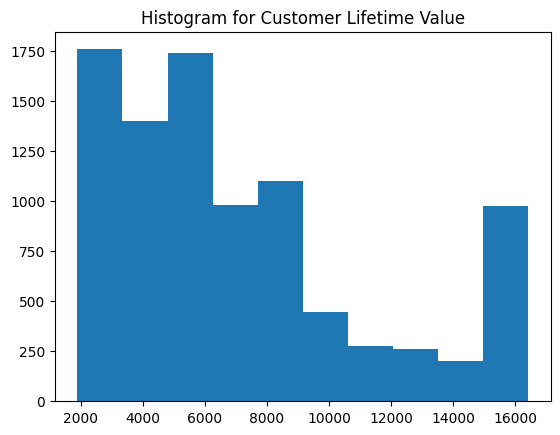

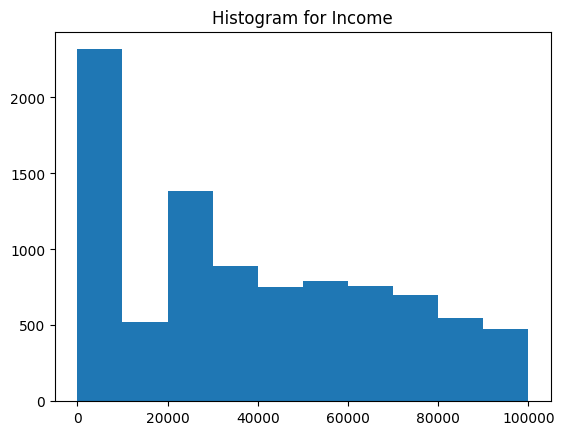

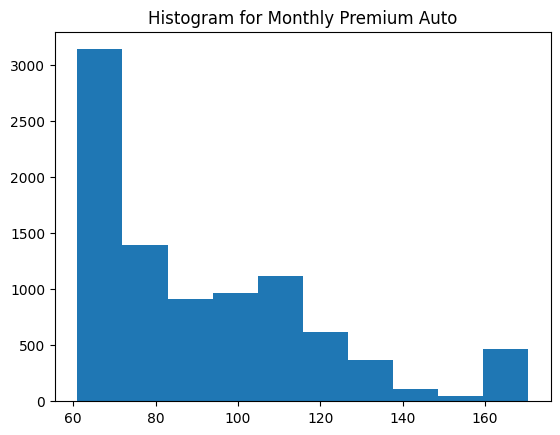

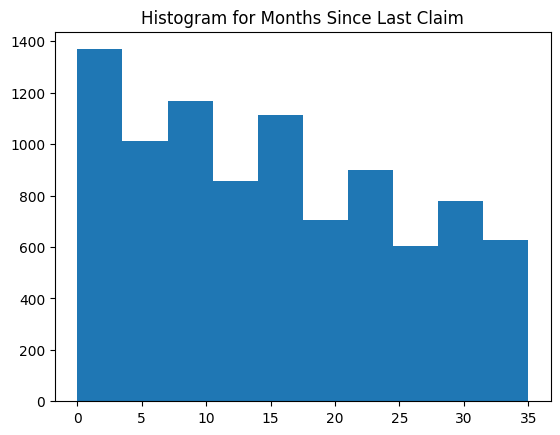

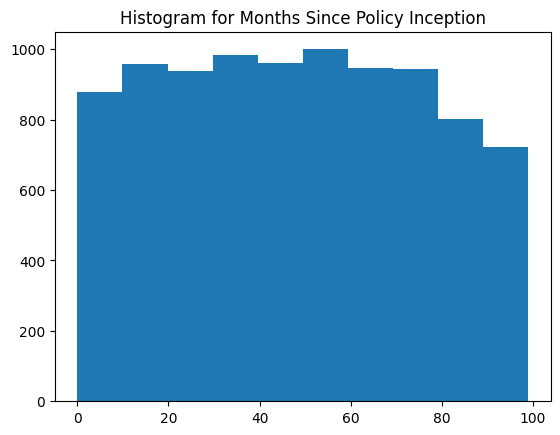

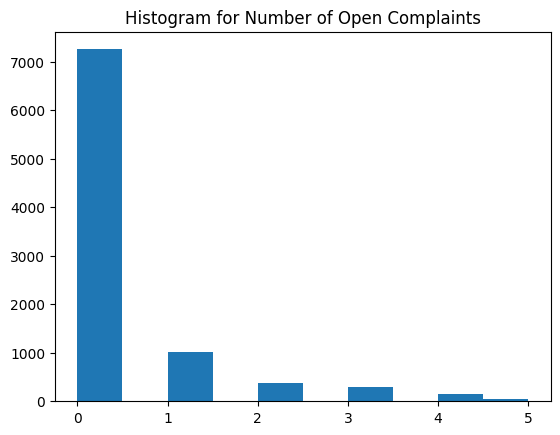

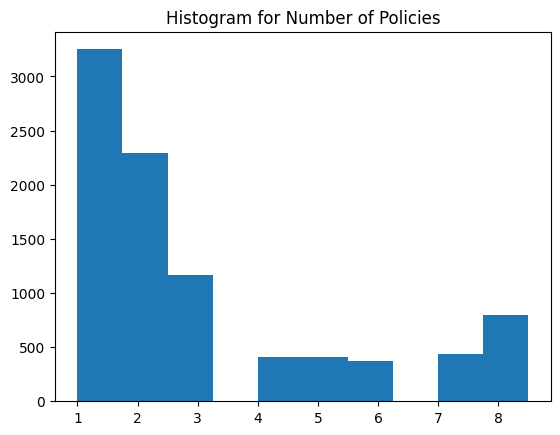

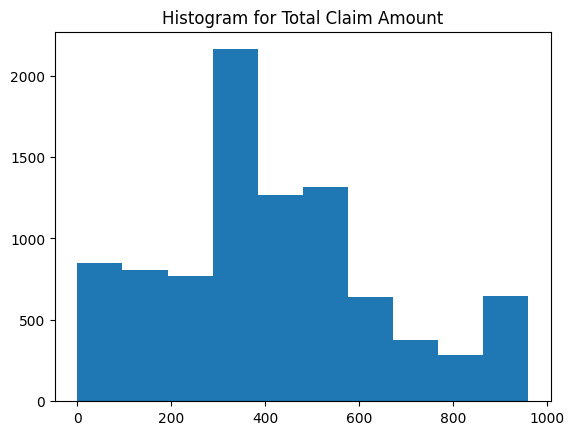

In [39]:
# Histogram describes the spread of data

for i in df_ins_num.columns:
    plt.hist(x = df_ins_num[i])
    plt.title("Histogram for "+str(i))
    plt.show()

((array([-3.78815982, -3.56175146, -3.43739314, ...,  3.43739314,
          3.56175146,  3.78815982]),
  array([ 1898.007675  ,  1898.683686  ,  1904.000852  , ...,
         16414.03991175, 16414.03991175, 16414.03991175])),
 (3959.5479575502045, 7185.701022054055, 0.934843493267907))

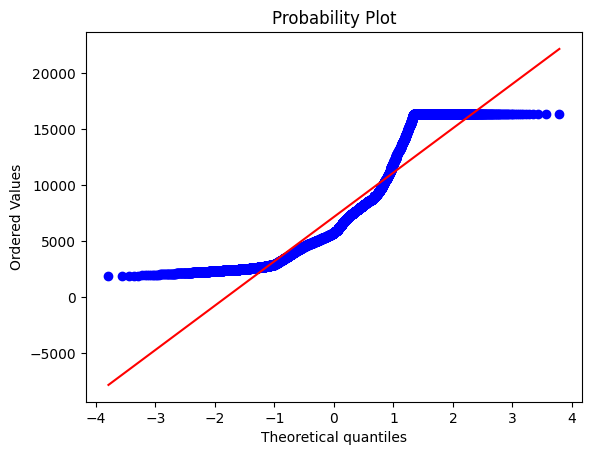

In [40]:
# Normal Q-Q Plot - Helps to understand if data is distributed Normally or not.

import scipy.stats as stats
import pylab

#checking whether data is normally distributed
stats.probplot(df_ins_num['Customer Lifetime Value'], dist="norm", plot = pylab)

((array([-3.78815982, -3.56175146, -3.43739314, ...,  3.43739314,
          3.56175146,  3.78815982]),
  array([    0,     0,     0, ..., 99960, 99961, 99981], dtype=int64)),
 (29179.954360504293, 37657.380008758475, 0.9601815245548406))

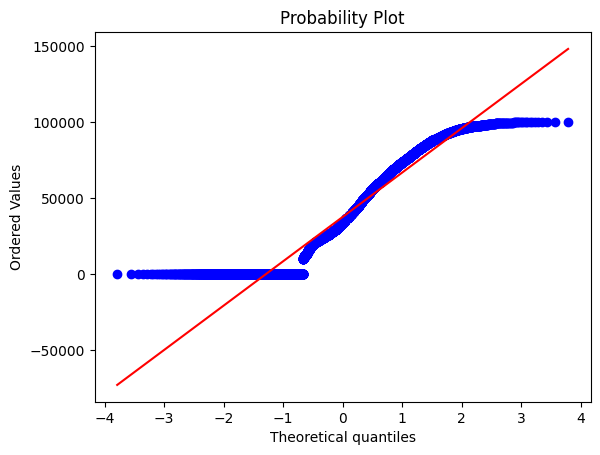

In [41]:
stats.probplot(df_ins_num['Income'], dist="norm", plot = pylab)

((array([-3.78815982, -3.56175146, -3.43739314, ...,  3.43739314,
          3.56175146,  3.78815982]),
  array([ 61. ,  61. ,  61. , ..., 170.5, 170.5, 170.5])),
 (26.452997269394814, 91.49463542807095, 0.9305998949241804))

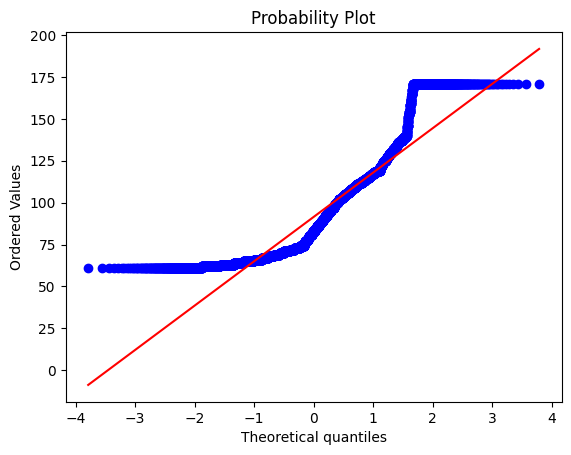

In [42]:
stats.probplot(df_ins_num['Monthly Premium Auto'], dist="norm", plot = pylab)

((array([-3.78815982, -3.56175146, -3.43739314, ...,  3.43739314,
          3.56175146,  3.78815982]),
  array([ 0,  0,  0, ..., 35, 35, 35], dtype=int64)),
 (9.823701814587851, 15.097000218962117, 0.9749007854843889))

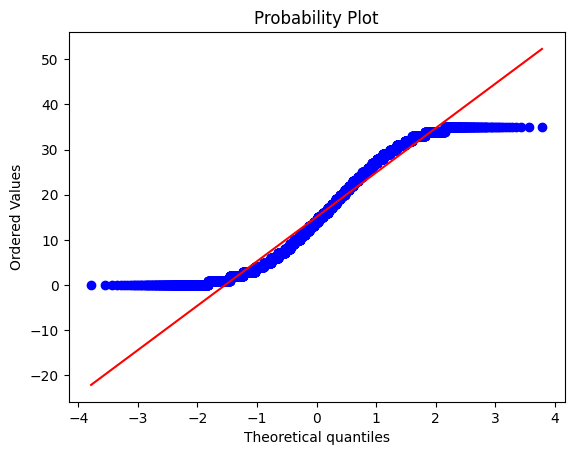

In [43]:
stats.probplot(df_ins_num['Months Since Last Claim'], dist="norm", plot = pylab)

((array([-3.78815982, -3.56175146, -3.43739314, ...,  3.43739314,
          3.56175146,  3.78815982]),
  array([ 0,  0,  0, ..., 99, 99, 99], dtype=int64)),
 (27.374891440115306, 48.06459382526822, 0.9806411282166116))

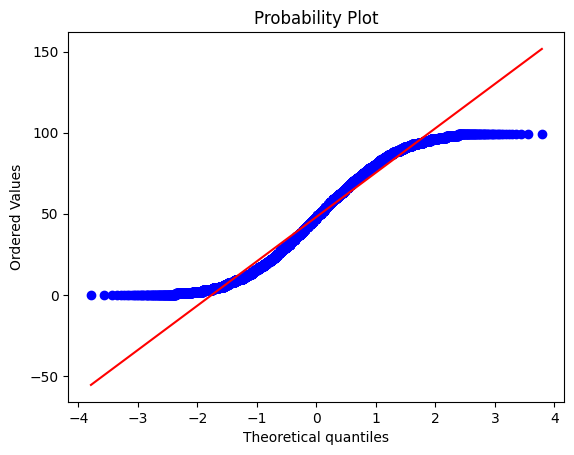

In [44]:
stats.probplot(df_ins_num['Months Since Policy Inception'], dist="norm", plot = pylab)

((array([-3.78815982, -3.56175146, -3.43739314, ...,  3.43739314,
          3.56175146,  3.78815982]),
  array([0, 0, 0, ..., 5, 5, 5], dtype=int64)),
 (0.6356923357958071, 0.3843880008758483, 0.6980358486209035))

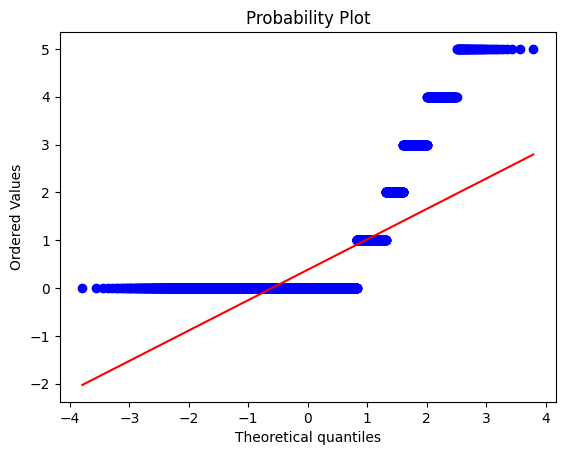

In [45]:
stats.probplot(df_ins_num['Number of Open Complaints'], dist="norm", plot = pylab)

((array([-3.78815982, -3.56175146, -3.43739314, ...,  3.43739314,
          3.56175146,  3.78815982]),
  array([1. , 1. , 1. , ..., 8.5, 8.5, 8.5])),
 (2.0646330452726573, 2.943398292095467, 0.884177639977473))

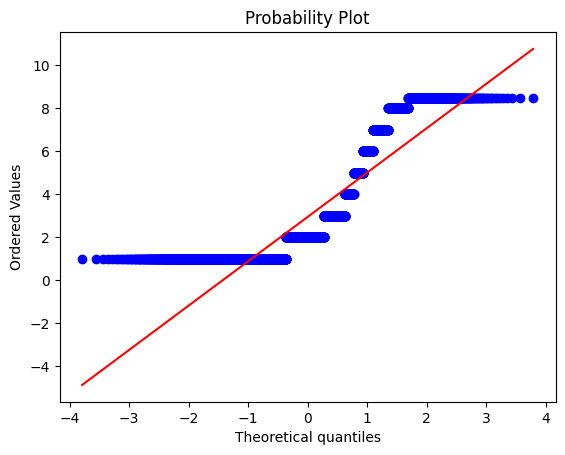

In [46]:
stats.probplot(df_ins_num['Number of Policies'], dist="norm", plot = pylab)

((array([-3.78815982, -3.56175146, -3.43739314, ...,  3.43739314,
          3.56175146,  3.78815982]),
  array([9.9007000e-02, 3.8210700e-01, 4.2331000e-01, ..., 9.6039973e+02,
         9.6039973e+02, 9.6039973e+02])),
 (235.64748096261653, 418.3221580595166, 0.9804983362711949))

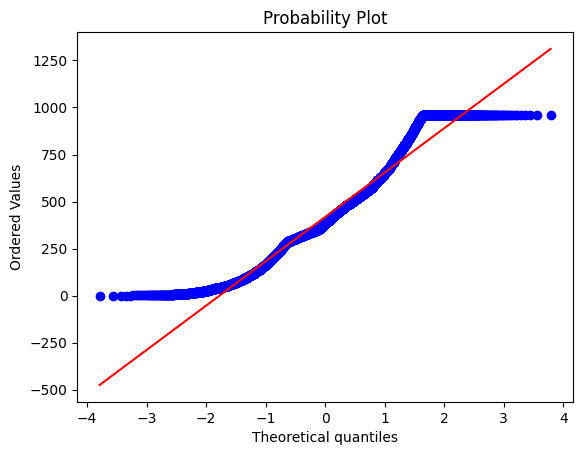

In [47]:
stats.probplot(df_ins_num['Total Claim Amount'], dist="norm", plot = pylab)

In [48]:
df_ins_num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69.0,32,5,0,1.0,384.811147
1,6979.535903,0,94.0,13,42,0,8.0,960.399730
2,12887.431650,48767,108.0,18,38,0,2.0,566.472247
3,7645.861827,0,106.0,18,65,0,7.0,529.881344
4,2813.692575,43836,73.0,12,44,0,1.0,138.130879


In [49]:
df_ins_cate.head()

,Customer,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,BU79786,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,QZ44356,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,AI49188,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,WW63253,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,HB64268,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [50]:
#Concatenate the entire data
df_new = pd.concat([df_ins_cate, df_ins_num], axis = 1)
df_new.head()

,Customer,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,...,Vehicle Size_Medsize,Vehicle Size_Small,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,BU79786,0,0,0,1,0,0,0,0,0,...,1,0,2763.519279,56274,69.0,32,5,0,1.0,384.811147
1,QZ44356,0,0,0,0,0,1,0,0,0,...,1,0,6979.535903,0,94.0,13,42,0,8.0,960.399730
2,AI49188,0,1,0,0,0,0,1,0,0,...,1,0,12887.431650,48767,108.0,18,38,0,2.0,566.472247
3,WW63253,1,0,0,0,0,0,0,0,0,...,1,0,7645.861827,0,106.0,18,65,0,7.0,529.881344
4,HB64268,0,0,0,1,0,0,0,0,0,...,1,0,2813.692575,43836,73.0,12,44,0,1.0,138.130879


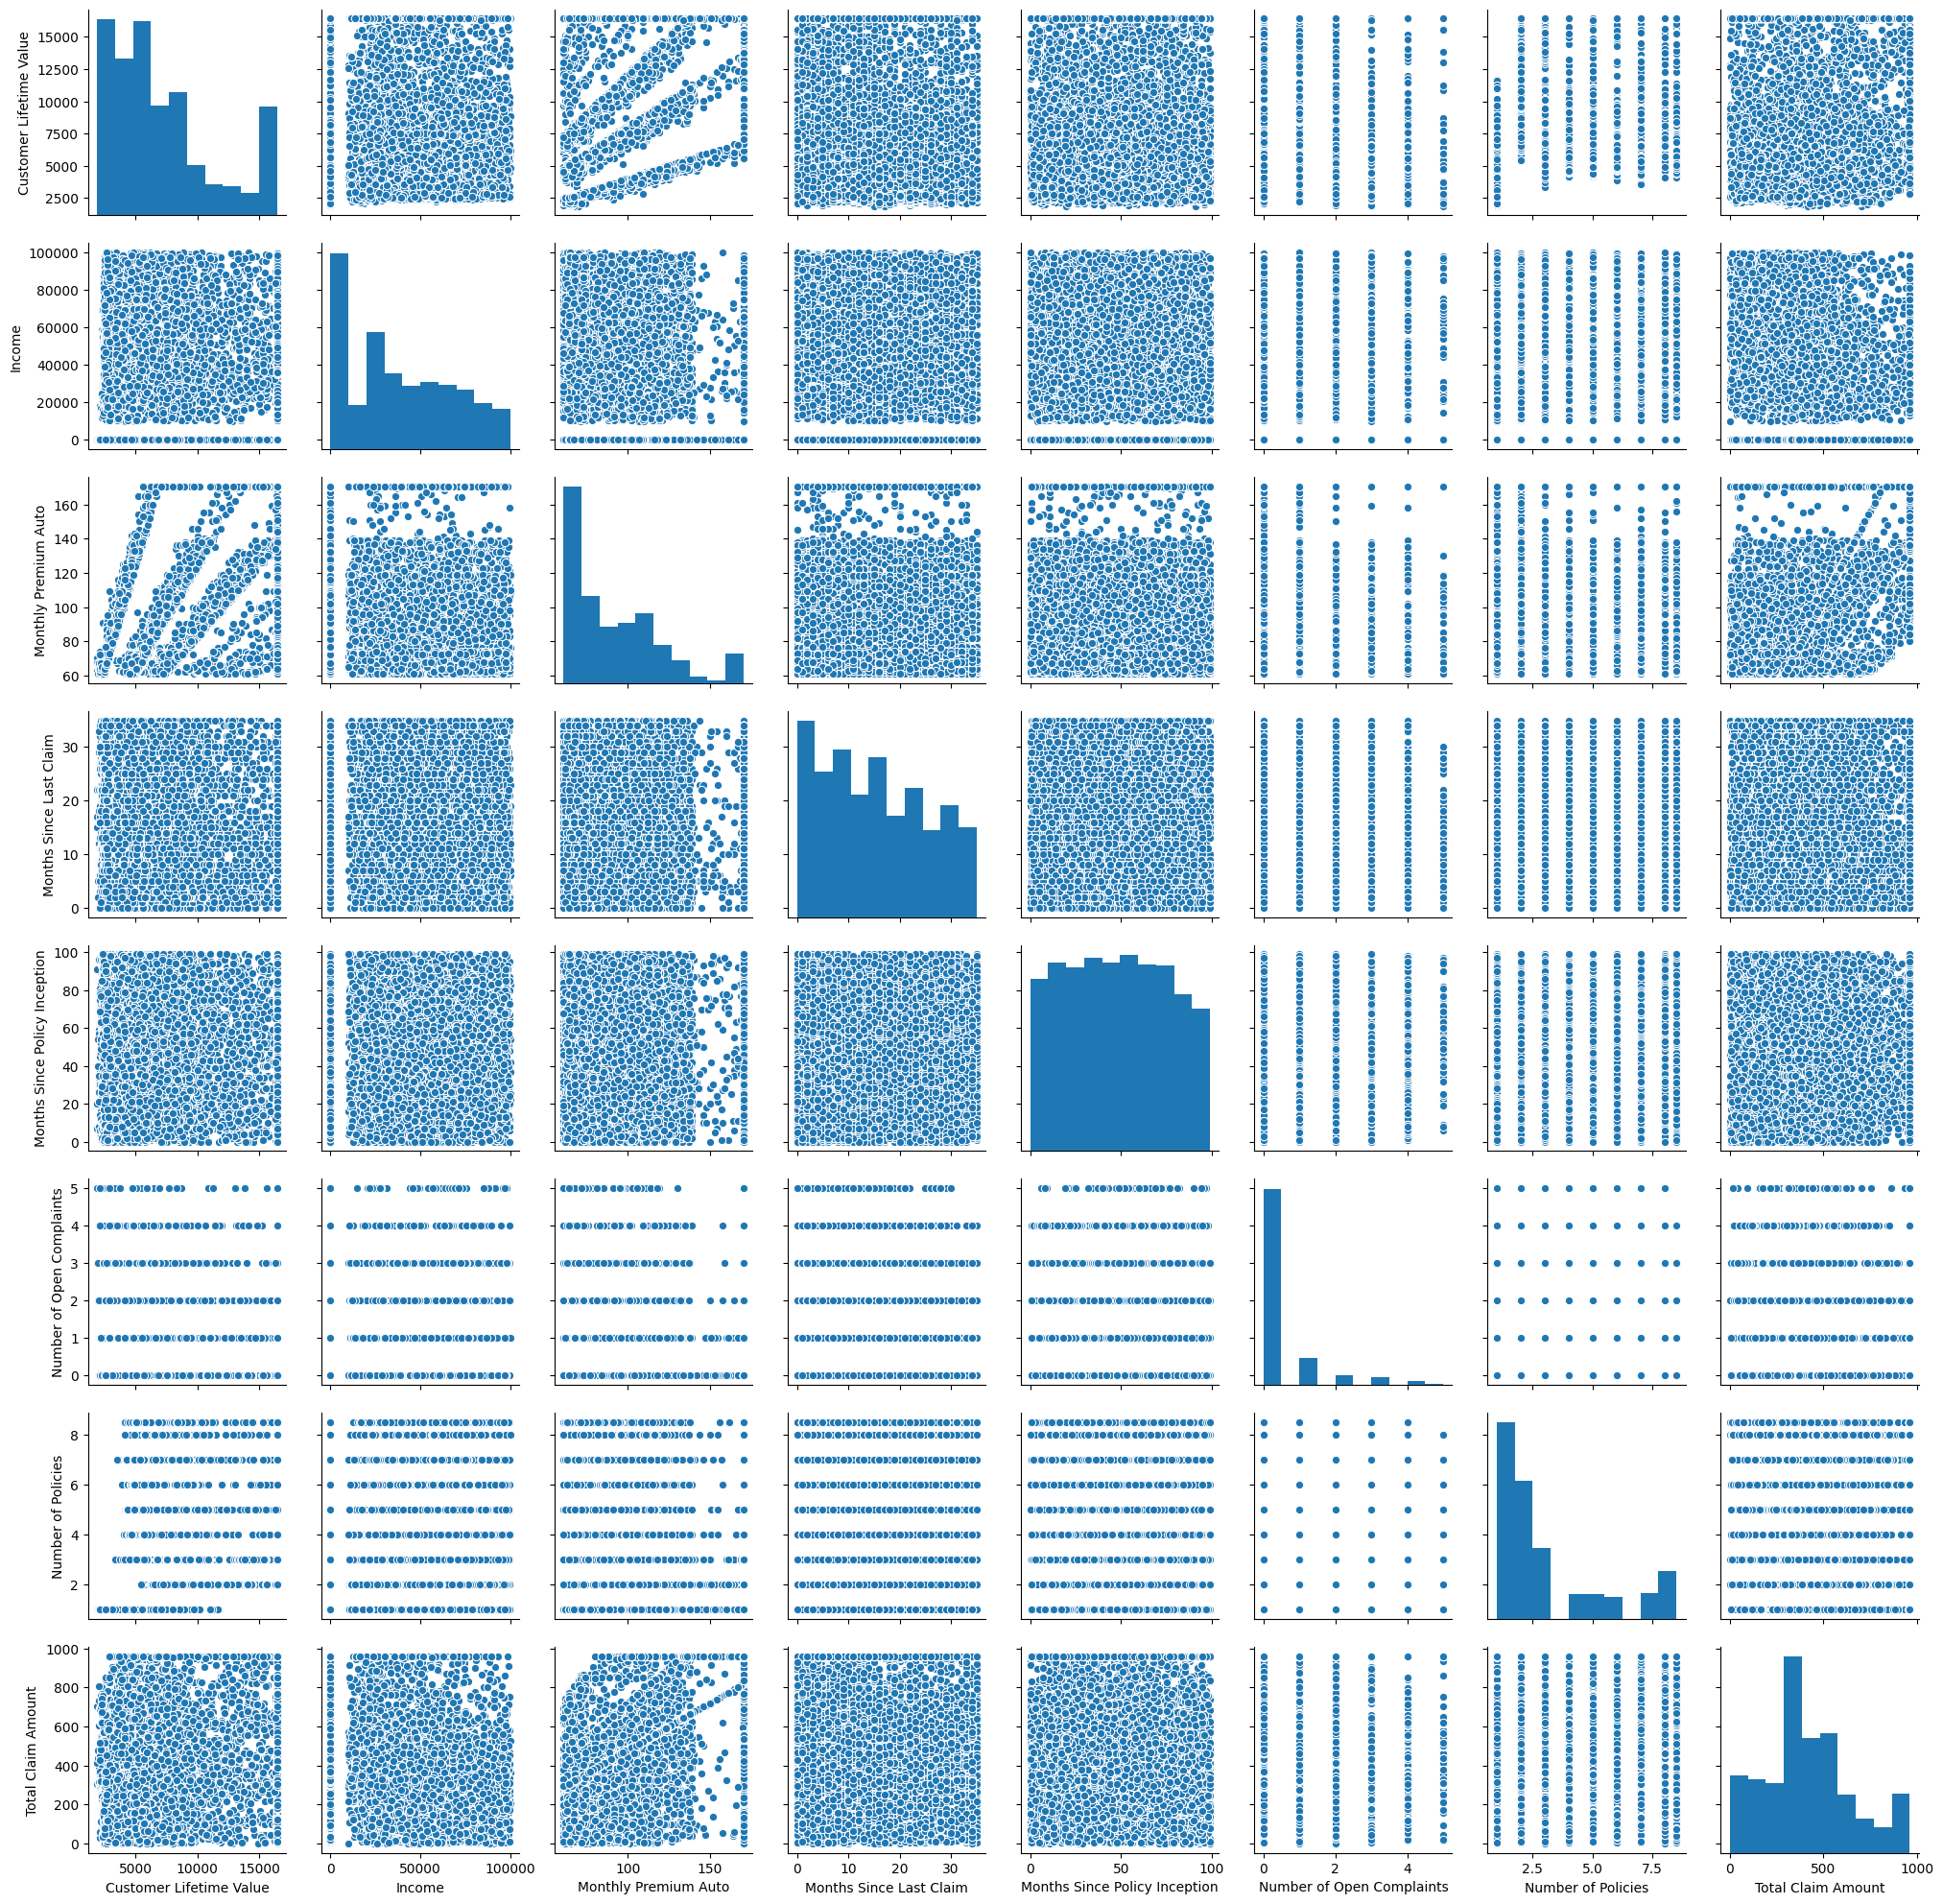

In [51]:
#Bivariate analysis
sns.pairplot(df_ins_num)

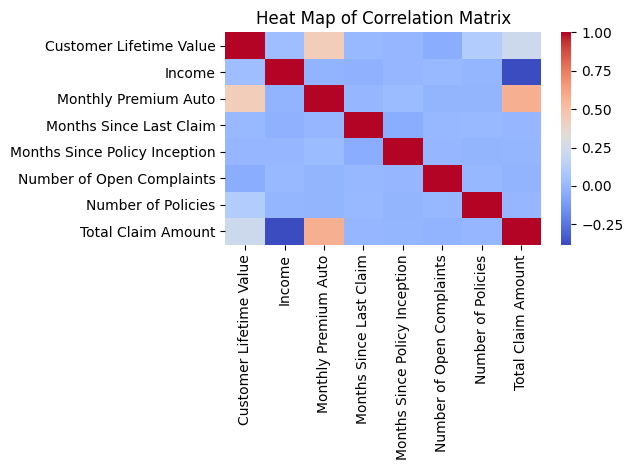

In [52]:
#Heatmap

corrmatrix = df_ins_num.corr(method = "pearson")

sns.heatmap(corrmatrix, xticklabels = corrmatrix.columns, yticklabels = corrmatrix.columns, cmap = "coolwarm")
plt.title('Heat Map of Correlation Matrix')
plt.tight_layout()
plt.show()

### Normalization

In [53]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return(x)

In [54]:
df_norm = norm_func(df_new.iloc[:,1:])

In [55]:
df_norm.describe()

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Vehicle Size_Medsize,Vehicle Size_Small,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,...,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,0.344865,0.096562,0.284760,0.087366,0.143201,0.300197,0.090212,0.293519,0.037443,0.287059,...,0.703306,0.193125,0.364266,0.376645,0.278490,0.431343,0.485501,0.076878,0.259120,0.435513
std,0.475350,0.295377,0.451325,0.282386,0.350297,0.458369,0.286501,0.455399,0.189854,0.452414,...,0.456825,0.394772,0.291685,0.303857,0.259509,0.287807,0.281879,0.182077,0.311241,0.250186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.144409,0.000000,0.063927,0.171429,0.242424,0.000000,0.000000,0.283410
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.267440,0.338959,0.200913,0.400000,0.484848,0.000000,0.133333,0.399715
75%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.486645,0.623318,0.438356,0.657143,0.717172,0.000000,0.400000,0.570046
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Hierarchical Clustering

In [56]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

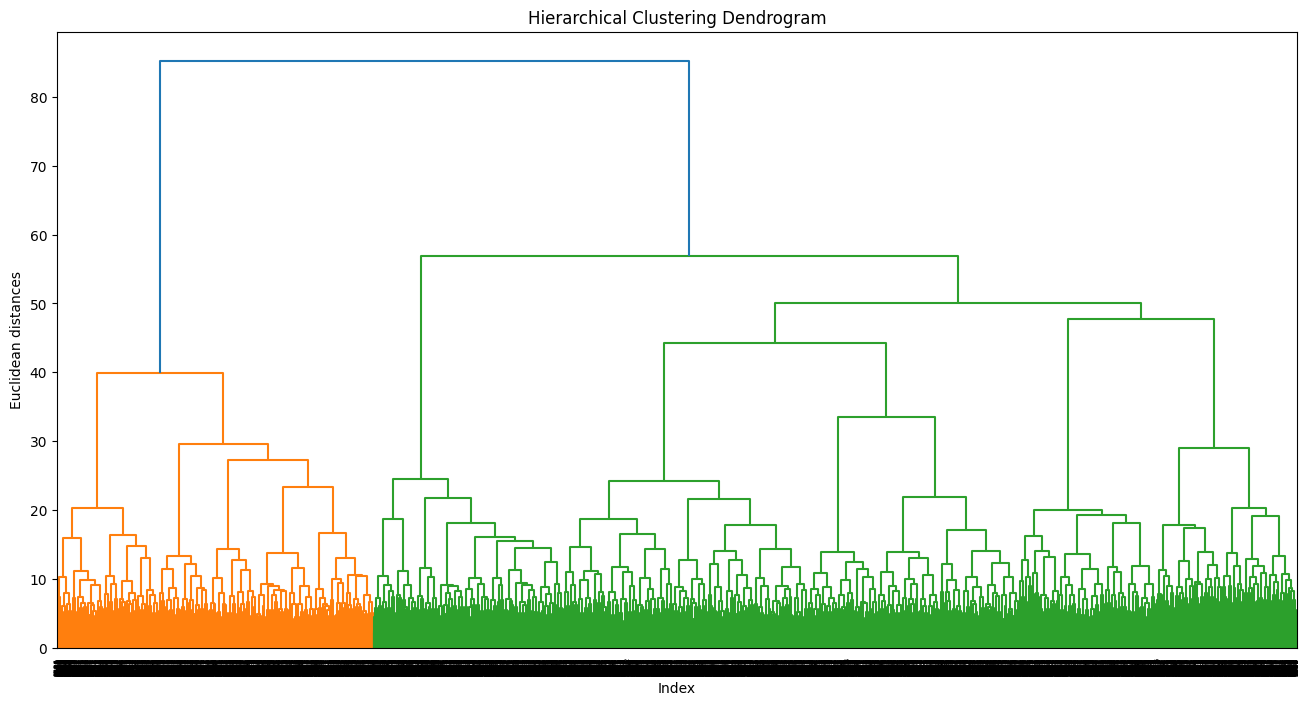

In [57]:
plt.figure(1, figsize = (16, 8))
tree_plot = dendrogram(linkage(df_norm, method = "ward"))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.show()

In [58]:
# Applying AgglomerativeClustering choosing 2 as clusters from the above dendrogram
hc1 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete' )

y_hc1 = hc1.fit_predict(df_norm)
y_hc1

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [59]:
np.unique(y_hc1)

array([0, 1], dtype=int64)

In [60]:
#average linkage
hc2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'average')

y_hc2 = hc2.fit_predict(df_norm)
y_hc2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
np.unique(y_hc2)

array([0, 1], dtype=int64)

In [62]:
#single linkage
hc3 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'single')

y_hc3 = hc3.fit_predict(df_norm)
y_hc3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
np.unique(y_hc3)

array([0, 1], dtype=int64)

In [64]:
# ward
hc4 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

y_hc4 = hc4.fit_predict(df_norm)
y_hc4

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [65]:
hc1.labels_

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [66]:
cluster_labels = pd.Series(hc1.labels_)

In [67]:
# Add cluster labels to original Dataset
df_ins_num['cluster'] = cluster_labels
df_ins_num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,cluster
0,2763.519279,56274,69.0,32,5,0,1.0,384.811147,0
1,6979.535903,0,94.0,13,42,0,8.0,960.399730,1
2,12887.431650,48767,108.0,18,38,0,2.0,566.472247,0
3,7645.861827,0,106.0,18,65,0,7.0,529.881344,1
4,2813.692575,43836,73.0,12,44,0,1.0,138.130879,0


## Cluster Evaluation

In [68]:
df1 = df_ins_num.sort_values(by = 'cluster', ascending = True)
df1

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,cluster
0,2763.519279,56274,69.0,32,5,0,1.0,384.811147,0
5727,4362.931238,58842,110.0,6,74,0,1.0,528.000000,0
5726,6575.538170,10517,92.0,14,65,0,3.0,441.540848,0
5723,16414.039912,17130,170.5,1,58,0,2.0,950.400000,0
5721,5923.518828,73758,74.0,24,87,0,7.0,301.562622,0
...,...,...,...,...,...,...,...,...,...
6490,14032.593760,0,170.5,14,94,1,8.0,916.800000,1
6492,2448.859093,0,68.0,35,52,0,1.0,489.600000,1
6493,3857.770745,0,110.0,20,62,0,1.0,792.000000,1
2079,6334.466403,0,63.0,1,21,0,2.0,302.400000,1


In [69]:
# Aggregate by doing mean of each cluster
df1.iloc[:,:].groupby(df1.cluster).mean()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
cluster,,,,,,,,
0,7280.963417,45684.27686,91.221556,15.014325,47.906749,0.384435,2.946970,373.530609
1,6816.648201,6560.65048,92.552561,15.417289,48.676094,0.384205,2.929562,591.847584


In [70]:
#Dividing cluster data
cluster0 = df1.loc[(df1.cluster == 0), :]
cluster0

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,cluster
0,2763.519279,56274,69.0,32,5,0,1.0,384.811147,0
5727,4362.931238,58842,110.0,6,74,0,1.0,528.000000,0
5726,6575.538170,10517,92.0,14,65,0,3.0,441.540848,0
5723,16414.039912,17130,170.5,1,58,0,2.0,950.400000,0
5721,5923.518828,73758,74.0,24,87,0,7.0,301.562622,0
...,...,...,...,...,...,...,...,...,...
3055,16414.039912,49673,170.5,27,57,0,7.0,960.399730,0
3087,16414.039912,92766,71.0,17,15,0,2.0,379.029102,0
3058,2860.864563,50332,72.0,2,11,0,1.0,345.600000,0
3040,7380.086414,21841,91.0,33,47,0,7.0,436.800000,0


In [71]:
cluster1 = df1.loc[(df1.cluster == 1), :]
cluster1

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,cluster
8719,6385.617852,0,63.0,16,35,1,2.0,302.400000,1
9078,5048.512037,0,142.0,10,51,0,1.0,880.435943,1
8637,2878.846941,0,85.0,33,69,0,1.0,612.000000,1
7842,2274.669484,0,64.0,12,25,0,1.0,621.968062,1
750,9927.049694,19592,92.0,31,63,0,2.0,441.600000,1
...,...,...,...,...,...,...,...,...,...
6490,14032.593760,0,170.5,14,94,1,8.0,916.800000,1
6492,2448.859093,0,68.0,35,52,0,1.0,489.600000,1
6493,3857.770745,0,110.0,20,62,0,1.0,792.000000,1
2079,6334.466403,0,63.0,1,21,0,2.0,302.400000,1


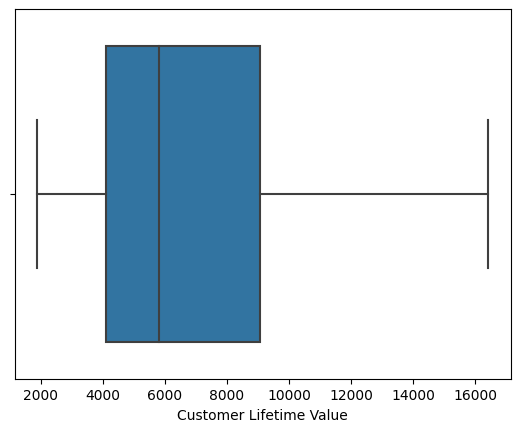

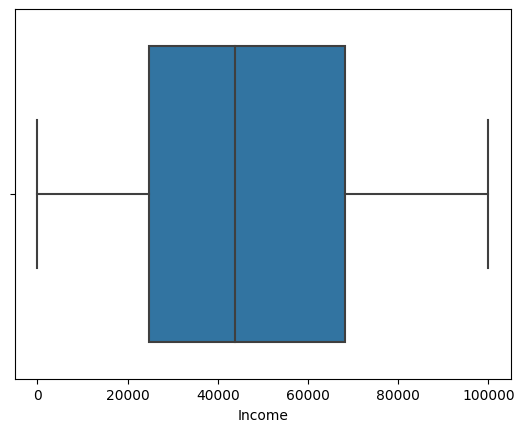

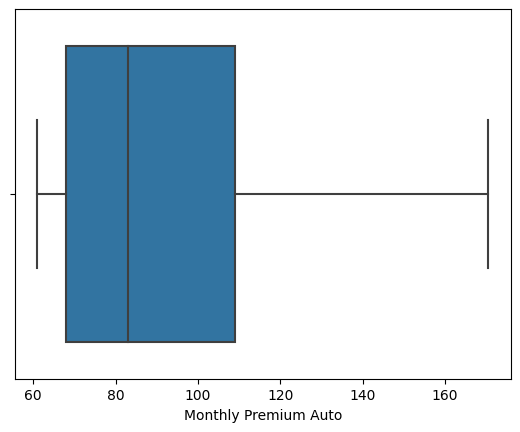

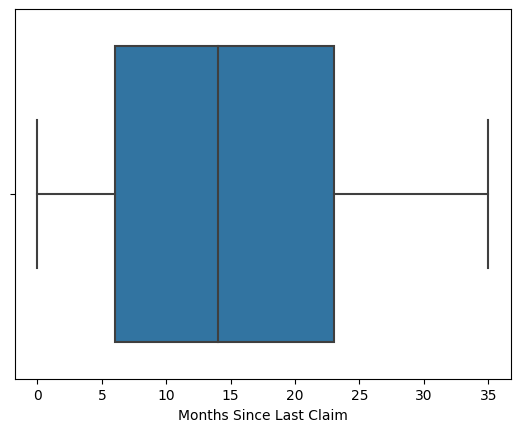

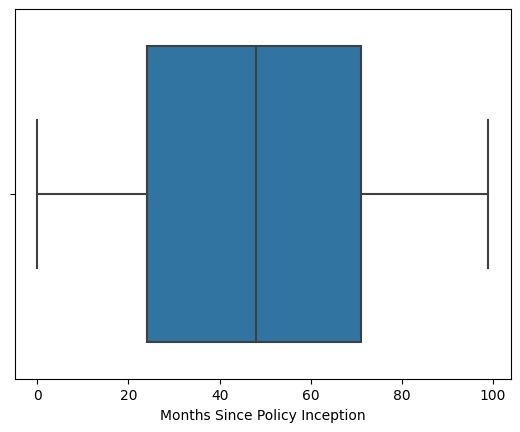

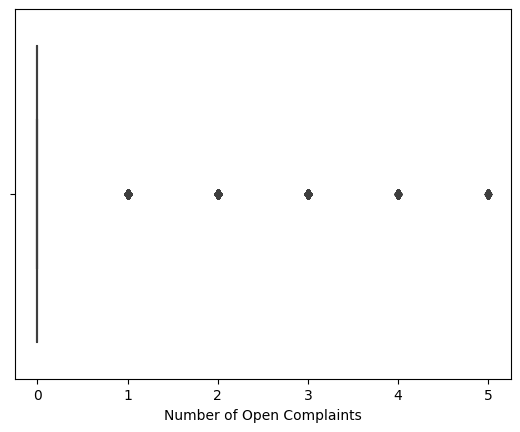

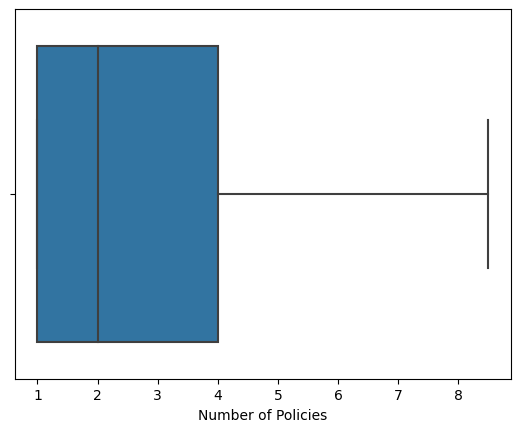

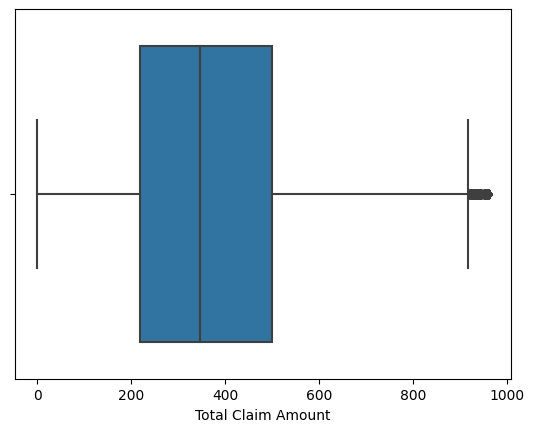

In [72]:
#Another way of evaluating clusters is using outliers
for i in cluster0.columns[:8]:
    sns.boxplot(x = cluster0[i])
    plt.show()

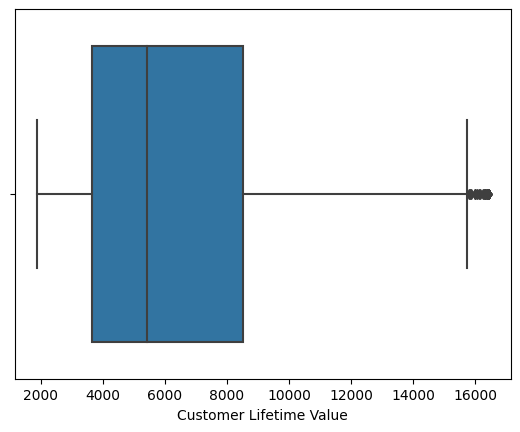

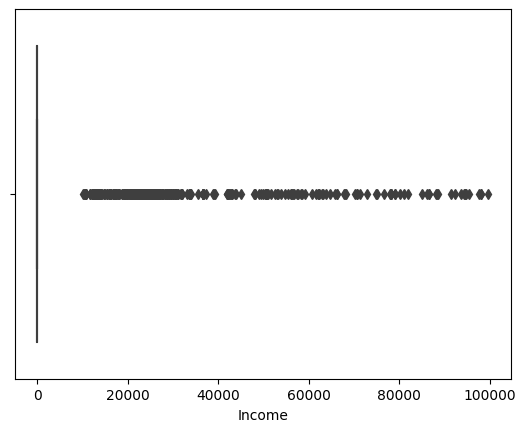

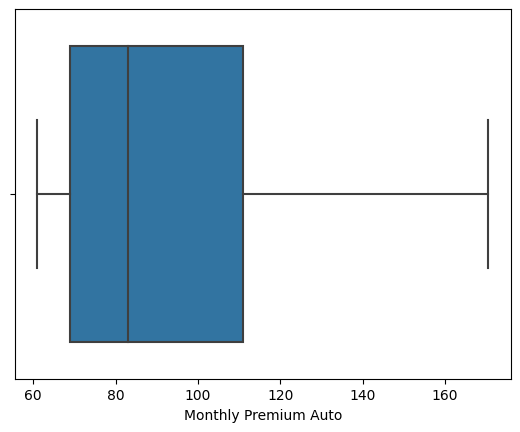

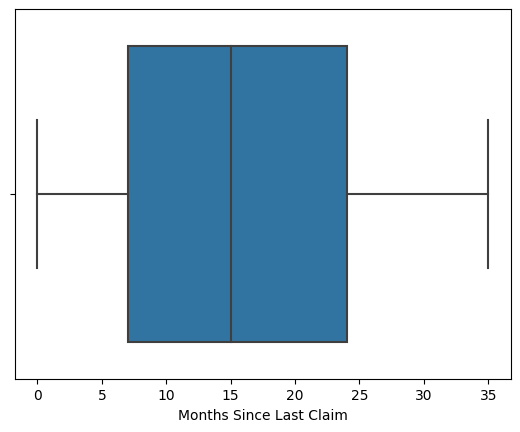

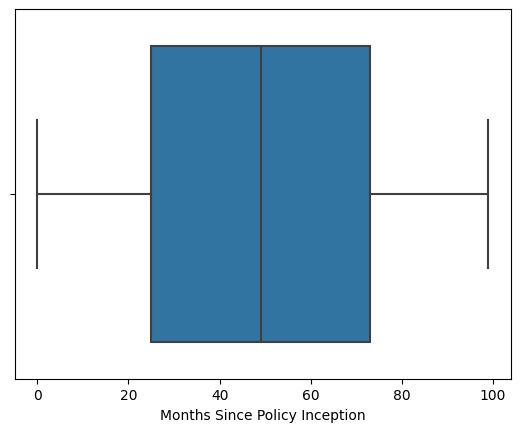

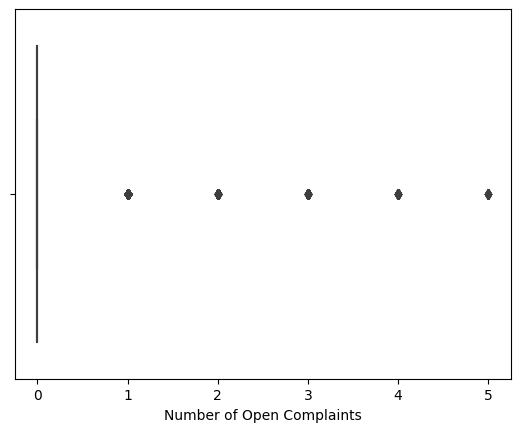

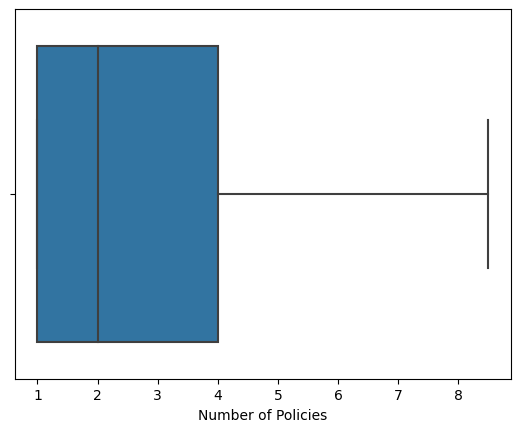

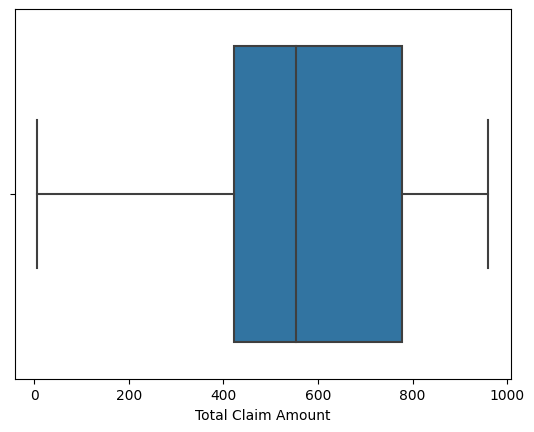

In [73]:
for i in cluster1.columns[:8]:
    sns.boxplot(x = cluster1[i])
    plt.show()

## Silhouette coefficient:

In [74]:
from sklearn import metrics

In [75]:
metrics.silhouette_score(df_norm, cluster_labels)

0.057842749182602515

### Calinski Harabasz

In [76]:
#Higher value means clusters are well separated
metrics.calinski_harabasz_score(df_norm, cluster_labels)

452.3388643321485

### Davies-Bouldin Index:

In [77]:
#The lower value means better the separation between your clusters.
metrics.davies_bouldin_score(df_norm, cluster_labels)

3.5639897586632396

In [78]:
from clusteval import clusteval
import numpy as np

#Silhouette cluster evaluation.
ce = clusteval(evaluate='silhouette')

In [79]:
df_array = np.array(df_norm)


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:54<00:00,  2.38s/it]


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [2].
[clusteval] >Fin.


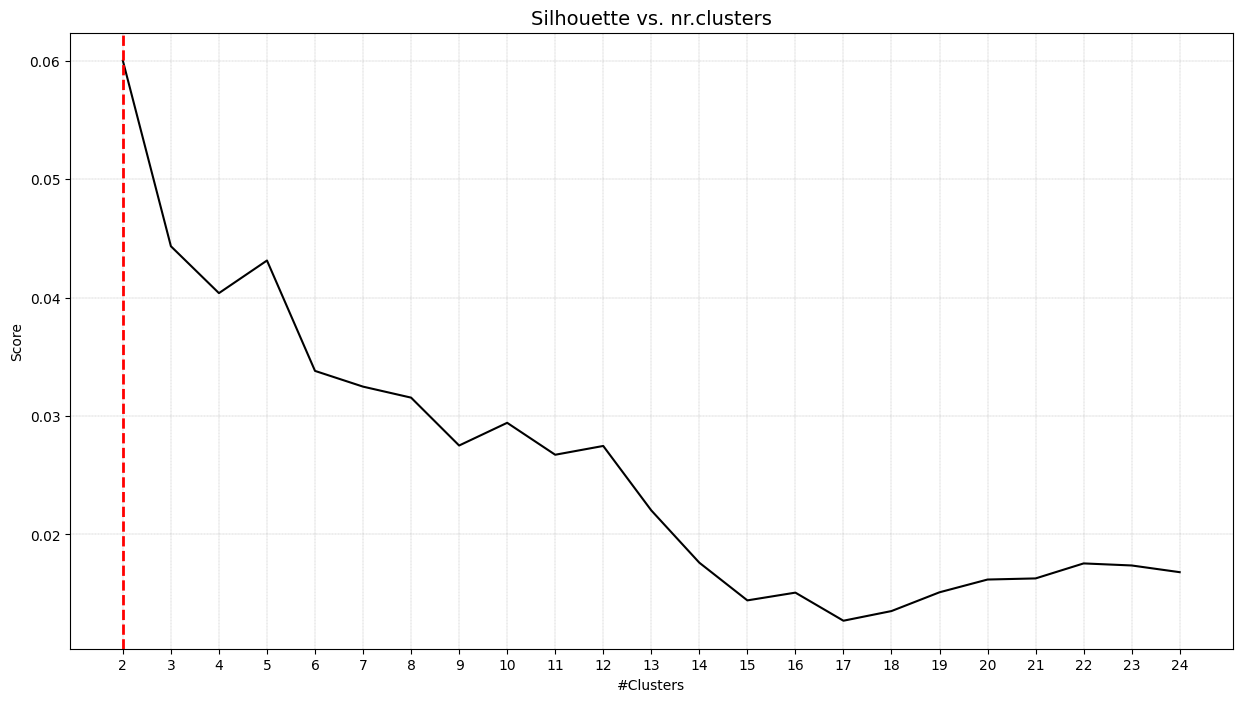

(<Figure size 1500x800 with 1 Axes>,
 <AxesSubplot:title={'center':'Silhouette vs. nr.clusters'}, xlabel='#Clusters', ylabel='Score'>)

In [80]:
#Fit
ce.fit(df_array)

ce.plot()

In [ ]:
# Best possible clusters for the auto insurance dataset is 2.